In [1]:
install.packages('devtools')
install.packages("zoo")
install.packages("proj4")
install.packages("ggalt")

devtools::install_github('bbc/bbplot')

#This line of code installs the pacman page if you do not have it installed - if you do, it simply loads the package
if(!require(pacman))install.packages("pacman")

pacman::p_load('dplyr', 'tidyr', 'gapminder',
               'ggplot2',
               'forcats', 'R.utils', 'png', 
               'grid', 'ggpubr', 'scales',
               'bbplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’, ‘ash’, ‘maps’, ‘extrafont’


Using github PAT from envvar GITHUB_TOKEN




withr    (2.5.0  -> 2.5.1) [CRAN]
fansi    (1.0.4  -> 1.0.5) [CRAN]
evaluate (0.21   -> 0.22 ) [CRAN]
testthat (3.1.10 -> 3.2.0) [CRAN]
ggplot2  (3.4.3  -> 3.4.4) [CRAN]
png      (NA     -> 0.1-8) [CRAN]


Installing 6 packages: withr, fansi, evaluate, testthat, ggplot2, png

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpGnMnHx/remotes2c54bcfe11b/bbc-bbplot-82af595/DESCRIPTION’ ... OK
* preparing ‘bbplot’:
* checking DESCRIPTION meta-information ...Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
 OK
Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
Warning in person1(given = given[[i]], family = family[[i]], middle = middle[[i]],  :
  It is recommended to use ‘given’ instead of ‘middle’.
Warning in person1(given = given[[i]], family

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gapminder installed



# Overall Percentages


Attaching package: ‘readr’


The following object is masked from ‘package:scales’:

    col_factor


New names:
• `` -> `...1`


`summarise()` has grouped output by 'year', 'field1'. You can override using
the `.groups` argument.
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”
Saving 6.67 x 6.67 in image


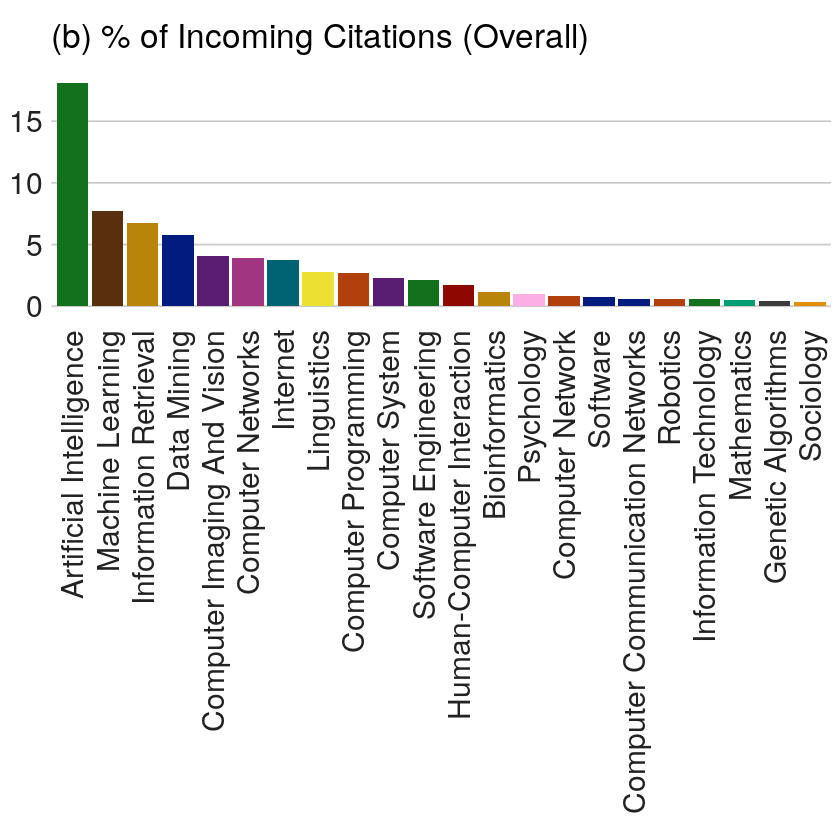

In [2]:
library(stringr)
library(ggplot2)
library(dplyr)
library(readr)

# Load the data
df_non_cs <- read_csv('./outputs/citations_non_cs_fields_to_nlp_by_year_quantiles.csv', show_col_types = FALSE)

# Group by 'year', 'field1', and 'field2', then sum the citation counts
df_non_cs <- df_non_cs %>%
  filter(year >= 1980) %>%
  group_by(year, field1, field2) %>%
  summarise(
    citations1_2 = sum(`#citations1->2`, na.rm = TRUE),
    citations2_1 = sum(`#citations2->1`, na.rm = TRUE),
    papersfield1 = sum(`#papersfield1`, na.rm = TRUE),
    papersfield2 = sum(`#papersfield2`, na.rm = TRUE),
  )

# Remove Computer Science from df_non_cs
df_non_cs <- df_non_cs %>%
  filter(field1 != "Computer Science" & field2 != "Computer Science")

# Load the data
df_cs <- read.csv("outputs/citations_cs_fields_to_nlp_by_year.csv")

# Rename columns
df_cs <- df_cs %>%
  rename(citations1_2 = `X.citations1..2`, citations2_1 = `X.citations2..1`)

# Capitalize the first letter of each word in the 'field1' and 'field2' columns
df_cs$field1 <- str_to_title(df_cs$field1)
df_cs$field2 <- str_to_title(df_cs$field2)

# Merge the two dataframes
df <- full_join(df_non_cs, df_cs, by = c("year", "field1", "field2", "citations1_2", "citations2_1"))

# Aggregate to get total counts per field over all years
df_agg <- df %>%
  group_by(field1) %>%
  summarise(
    total_citations1_2 = sum(citations1_2, na.rm = TRUE),
    total_citations2_1 = sum(citations2_1, na.rm = TRUE)
  )

# Compute the percentages
df_agg <- df_agg %>%
  mutate(
    perc_citations1_2 = total_citations1_2 / sum(total_citations1_2) * 100,
    perc_citations2_1 = total_citations2_1 / sum(total_citations2_1) * 100,
  )

# Find the rank of Sociology
sociology_rank <- which(arrange(df_agg, desc(perc_citations1_2))$field1 == "Sociology")

# Select only the top fields up to Sociology
df_agg_top <- df_agg %>%
  arrange(desc(perc_citations1_2)) %>%
  slice(1:sociology_rank)

# Remove Natural Language Processing and Computer Systems
df_agg_top <- df_agg_top %>%
  filter(field1 != "Natural Language Processing" & field1 != "Computer Systems")

# Create color mapping
color_map <- c(
  "Chemistry" = rgb(0.004, 0.451, 0.698),
  "Economics" = rgb(0.871, 0.561, 0.020),
  "Education" = rgb(0.008, 0.620, 0.451),
  "Geography" = rgb(0.835, 0.369, 0.0),
  "Geology" = rgb(0.8, 0.471, 0.737),
  "Computer Science" = rgb(0.792, 0.569, 0.380),
  "Psychology" = rgb(0.984, 0.686, 0.894),
  "Physics" = rgb(0.580, 0.580, 0.580),
  "Business" = rgb(0.925, 0.882, 0.2),
  "Engineering" = rgb(0.337, 0.706, 0.914),
  "Law" = rgb(0.004, 0.451, 0.698),
  "Sociology" = rgb(0.871, 0.561, 0.020),
  "Mathematics" = rgb(0.008, 0.620, 0.451),
  "Philosophy" = rgb(0.835, 0.369, 0.0),
  "Agricultural And Food Sciences" = rgb(0.8, 0.471, 0.737),
  "History" = rgb(0.792, 0.569, 0.380),
  "Medicine" = rgb(0.984, 0.686, 0.894),
  "Materials Science" = rgb(0.580, 0.580, 0.580),
  "Linguistics" = rgb(0.925, 0.882, 0.2),
  "Environmental Science" = rgb(0.337, 0.706, 0.914),
  "Biology" = rgb(0.004, 0.451, 0.698),
  "Art" = rgb(0.871, 0.561, 0.020),
  "Political Science" = rgb(0.008, 0.620, 0.451),
  "Data Mining" = rgb(0.0, 0.110, 0.498),
  "Computer Network" = rgb(0.694, 0.251, 0.051),
  "Artificial Intelligence" = rgb(0.071, 0.443, 0.110),
  "Medical Informatics" = rgb(0.549, 0.031, 0.0),
  "Computer Imaging And Vision" = rgb(0.349, 0.118, 0.443),
  "Computer Aided Design (Cad)" = rgb(0.349, 0.184, 0.051),
  "Expert Systems" = rgb(0.635, 0.208, 0.510),
  "Computer Operating Systems" = rgb(0.235, 0.235, 0.235),
  "Information Retrieval" = rgb(0.722, 0.522, 0.039),
  "Internet" = rgb(0.0, 0.388, 0.455),
  "Software" = rgb(0.0, 0.110, 0.498),
  "Robotics" = rgb(0.694, 0.251, 0.051),
  "Information Technology" = rgb(0.071, 0.443, 0.110),
  "Operating Systems" = rgb(0.549, 0.031, 0.0),
  "Computer System" = rgb(0.349, 0.118, 0.443),
  "Machine Learning" = rgb(0.349, 0.184, 0.051),
  "Computer Networks" = rgb(0.635, 0.208, 0.510),
  "Genetic Algorithms" = rgb(0.235, 0.235, 0.235),
  "Bioinformatics" = rgb(0.722, 0.522, 0.039),
  "Natural Language Processing" = rgb(0.0, 0.388, 0.455),
  "Computer Communication Networks" = rgb(0.0, 0.110, 0.498),
  "Computer Programming" = rgb(0.694, 0.251, 0.051),
  "Software Engineering" = rgb(0.071, 0.443, 0.110),
  "Human-Computer Interaction" = rgb(0.549, 0.031, 0.0),
  "Computer Aided Design" = rgb(0.349, 0.118, 0.443)
)

# Apply color mapping to the plot
ggplot(df_agg_top, aes(x = reorder(field1, -perc_citations1_2), y = perc_citations1_2, fill = field1)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = color_map) +
  bbc_style() +
  xlab("Fields") +
  ylab("Percentage of Citations (%)") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.subtitle = element_text(size = 20)) +
  labs(subtitle="(b) % of Incoming Citations (Overall)") +
  guides(fill = FALSE)

# Save the figure with large width
ggsave("figures/percentage_of_incoming_citations_per_field.pdf")

Saving 6.67 x 6.67 in image


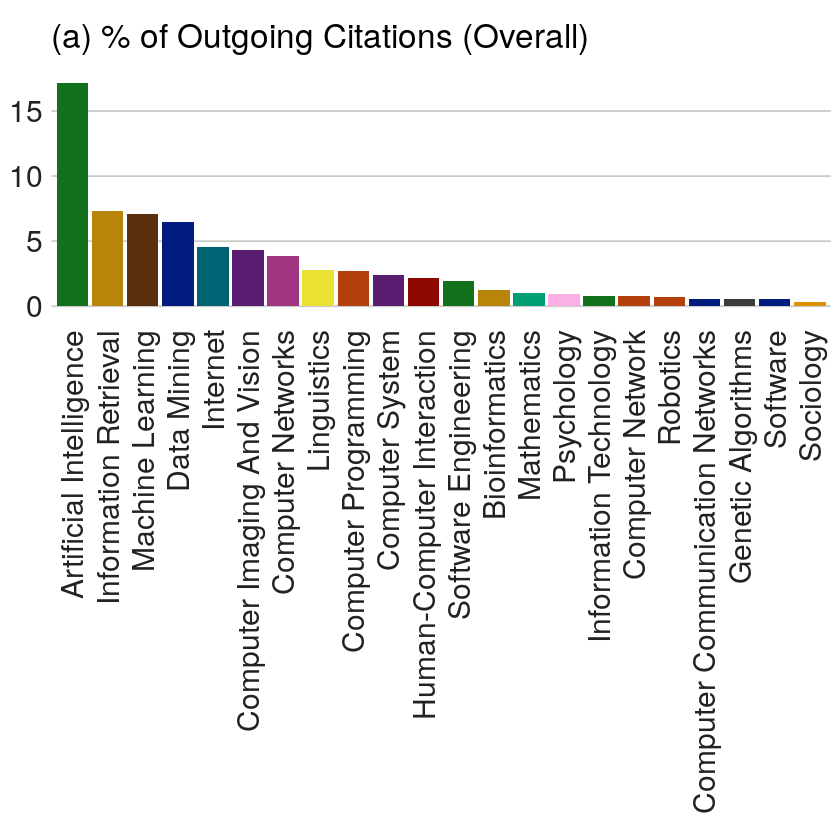

In [3]:
# Apply color mapping to the plot
ggplot(df_agg_top, aes(x = reorder(field1, -perc_citations2_1), y = perc_citations2_1, fill = field1)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = color_map) +
  bbc_style() +
  xlab("Fields") +
  ylab("Percentage of Citations (%)") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.subtitle = element_text(size = 20)) +
  labs(subtitle="(a) % of Outgoing Citations (Overall)") +
  guides(fill = FALSE)

# Save the figure with large width
ggsave("figures/percentage_of_outgoing_citations_per_field.pdf")

# Multi-Field Papers

New names:
• `` -> `...1`
New names:
• `` -> `...1`
Saving 6.67 x 5 in image


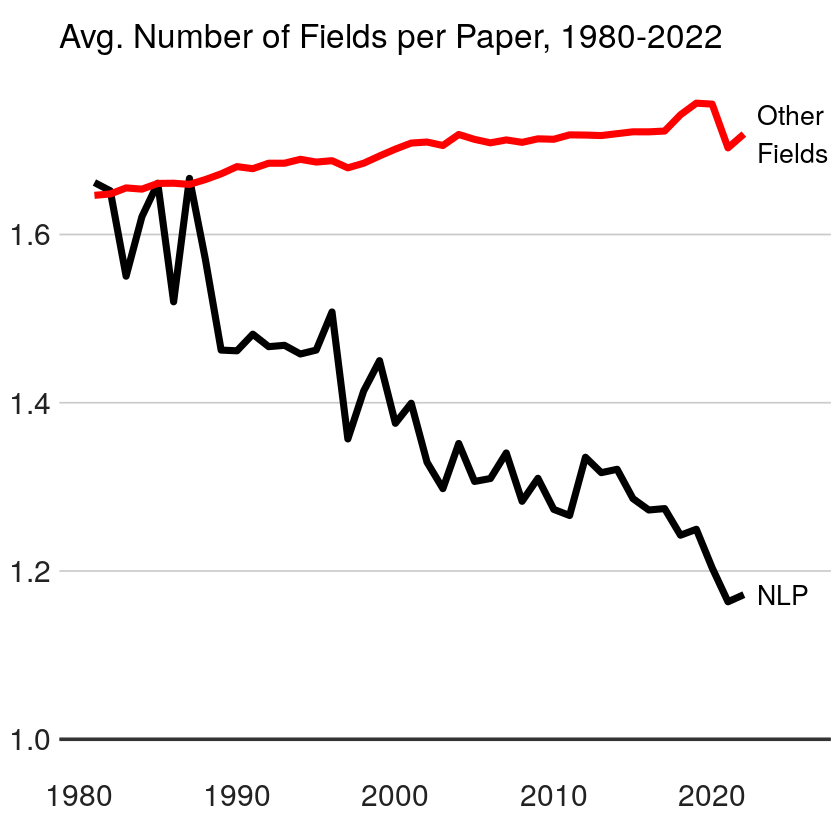

In [4]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)

# Load the data
nlp_fields_stats_df <- read_csv("outputs/insularity_number_of_fields_nlp_papers_have_on_average.csv", show_col_types = FALSE)
all_fields_stats_df <- read_csv("outputs/insularity_number_of_fields_papers_have_on_average.csv", show_col_types = FALSE)

# Filter the data
nlp_fields_stats_df <- nlp_fields_stats_df[nlp_fields_stats_df$year > 1980, ]
all_fields_stats_df <- all_fields_stats_df[all_fields_stats_df$year > 1980, ]

# Merge the data frames for easier plotting
df <- merge(nlp_fields_stats_df, all_fields_stats_df, by = "year")

# Get the last year for annotation placement
last_year <- max(df$year)

# Get the extra room needed for the annotation
extra_room <- (max(df$year) - min(df$year)) * 0.02

# Plotting the data
ggplot(df, aes(x = year)) +
  geom_line(aes(y = avg_nlp_fields), color = 'black', lwd = 2) +
  geom_line(aes(y = avg_all_fields), color = 'red', lwd = 2) +
  annotate("text", x = last_year + extra_room, y = tail(df$avg_nlp_fields, n = 1), label = "NLP", hjust = 0, size=16/.pt) +
  annotate("text", x = last_year + extra_room, y = tail(df$avg_all_fields, n = 1), label = "Other\nFields", hjust = 0, size=16/.pt) +
  labs(x = "Year", y = "Average Number of Fields") +
  xlim(min(df$year), max(df$year) + 4 * extra_room) +
  geom_hline(yintercept = 1, linewidth = 1, colour="#333333") +
  bbc_style() +
  labs(subtitle = "Avg. Number of Fields per Paper, 1980-2022") + 
  theme(plot.subtitle = element_text(size = 20))

ggsave("figures/average_number_of_fields_diachronic_r.pdf", height=5)

# Self-Citations

New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
Saving 6.67 x 5 in image


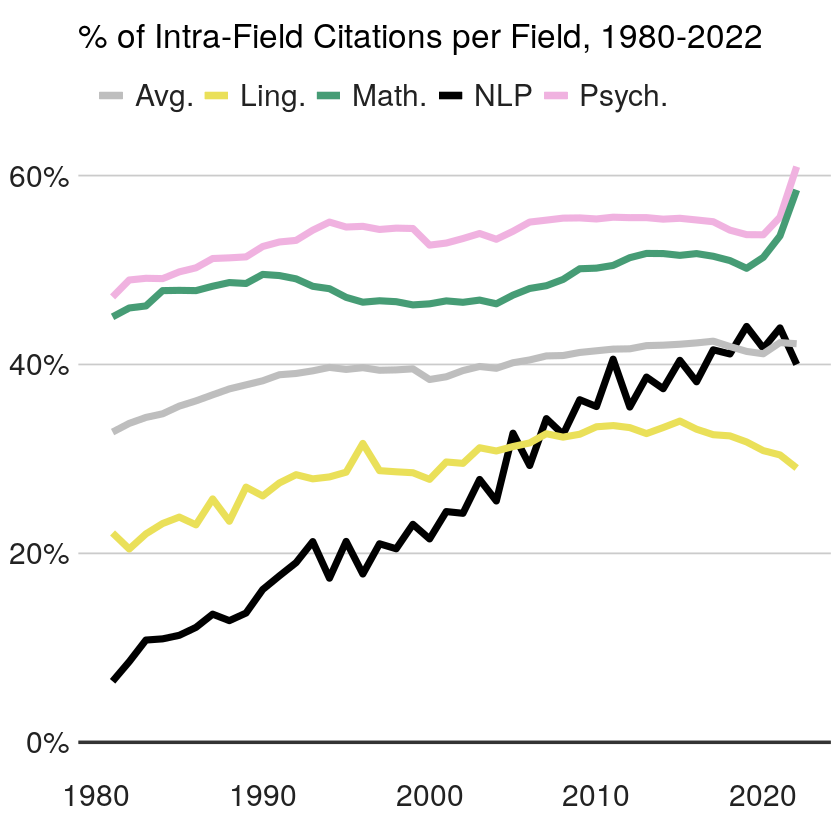

In [5]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)

# Load the data
nlp_df <- read_csv("outputs/insularity_NLP.csv", show_col_types = FALSE)
psychology_df <- read_csv("outputs/insularity_Psychology.csv", show_col_types = FALSE)
linguistics_df <- read_csv("outputs/insularity_Linguistics.csv", show_col_types = FALSE)
mathematics_df <- read_csv("outputs/insularity_Mathematics.csv", show_col_types = FALSE)
macro_avg_df <- read_csv("outputs/macro_avg_self_citation.csv", show_col_types = FALSE)

# Filter dataframes by year and sort them
nlp_df <- nlp_df[nlp_df$citation_year > 1980, ] %>% arrange(citation_year)
psychology_df <- psychology_df[psychology_df$citation_year > 1980, ] %>% arrange(citation_year)
linguistics_df <- linguistics_df[linguistics_df$citation_year > 1980, ] %>% arrange(citation_year)
mathematics_df <- mathematics_df[mathematics_df$citation_year > 1980, ] %>% arrange(citation_year)
macro_avg_df <- macro_avg_df[macro_avg_df$citation_year > 1980, ] %>% arrange(citation_year)

# Rename the self_citation_percentage column in each dataframe for clarity
nlp_df <- rename(nlp_df, self_citation_percentage_NLP = self_citation_percentage)
psychology_df <- rename(psychology_df, self_citation_percentage_Psychology = self_citation_percentage)
linguistics_df <- rename(linguistics_df, self_citation_percentage_Linguistics = self_citation_percentage)
mathematics_df <- rename(mathematics_df, self_citation_percentage_Mathematics = self_citation_percentage)
macro_avg_df <- rename(macro_avg_df, self_citation_percentage_macro_avg = self_citation_percentage)

# Merge the data frames for easier plotting
df <- nlp_df %>% 
  full_join(psychology_df, by = "citation_year") %>%
  full_join(linguistics_df, by = "citation_year") %>%
  full_join(mathematics_df, by = "citation_year") %>%
  full_join(macro_avg_df, by = "citation_year")

# Get the last year for annotation placement
last_year <- max(df$citation_year)

# Get the extra room needed for the annotation
extra_room <- (max(df$citation_year) - min(df$citation_year)) * 0.02

# Create a named vector for colors
colors <- c('NLP' = 'black',
            'Psych.' = '#f0b2e0',
            'Ling.' = '#eae059',
            'Math.' = '#469c75',
            'Avg.' = 'grey')

# Plotting the data
ggplot(df, aes(x = citation_year)) +
  geom_line(aes(y = self_citation_percentage_NLP, color = 'NLP'), lwd = 2) +
  geom_line(aes(y = self_citation_percentage_Psychology, color = 'Psych.'), lwd = 2) +
  geom_line(aes(y = self_citation_percentage_Linguistics, color = 'Ling.'), lwd = 2) +
  geom_line(aes(y = self_citation_percentage_Mathematics, color = 'Math.'), lwd = 2) +
  geom_line(aes(y = self_citation_percentage_macro_avg, color = 'Avg.'), lwd = 2) +
  geom_hline(yintercept = 0, linewidth = 1, colour="#333333") +
  labs(x = "Year", y = "Self Citation Percentage", color = "Field") +
  bbc_style() +
  scale_y_continuous(labels = scales::percent) +
  labs(subtitle = "% of Intra-Field Citations per Field, 1980-2022") +
  scale_color_manual(values = colors) +
  theme(legend.position = "top",
        legend.justification = "left",
        plot.subtitle = element_text(size = 20))

ggsave("figures/self_citation_percentage_over_time_r.pdf", height=5)

# CFDI Diversity

In [6]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
# Load the NLP data
nlp_df <- read_csv("outputs/nlp_papers_diversity.csv", show_col_types = FALSE)

# Filter the dataframe by year
nlp_df <- nlp_df[nlp_df$year > 1980 & nlp_df$year < 2020, ] %>% arrange(year)

# Group data by year and calculate the mean of the diversity for each year
nlp_df <- nlp_df %>% 
  group_by(year) %>% 
  summarise(incoming_diversity = mean(incoming_diversity, na.rm = TRUE),
            outgoing_diversity = mean(outgoing_diversity, na.rm = TRUE))

# Load the new data
all_fields_df <- read_csv("outputs/avg_diversity_all_fields_by_year.csv", show_col_types = FALSE)

# Filter the dataframe by year
all_fields_df <- all_fields_df[all_fields_df$year > 1980 & all_fields_df$year < 2020, ] %>% arrange(year)

# Group data by year and field and calculate the mean of the diversity for each year and field
all_fields_df <- all_fields_df %>%
  group_by(year, field) %>% 
  summarise(avg_incoming_diversity = mean(avg_incoming_diversity, na.rm = TRUE),
            avg_outgoing_diversity = mean(avg_outgoing_diversity, na.rm = TRUE))

# Group data by year and calculate the average diversity over all fields for each year
average_diversity_df <- all_fields_df %>% 
  group_by(year) %>% 
  summarise(avg_incoming_diversity = mean(avg_incoming_diversity, na.rm = TRUE),
            avg_outgoing_diversity = mean(avg_outgoing_diversity, na.rm = TRUE))


New names:
• `` -> `...1`
New names:
• `` -> `...1`
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


Saving 6.67 x 5 in image


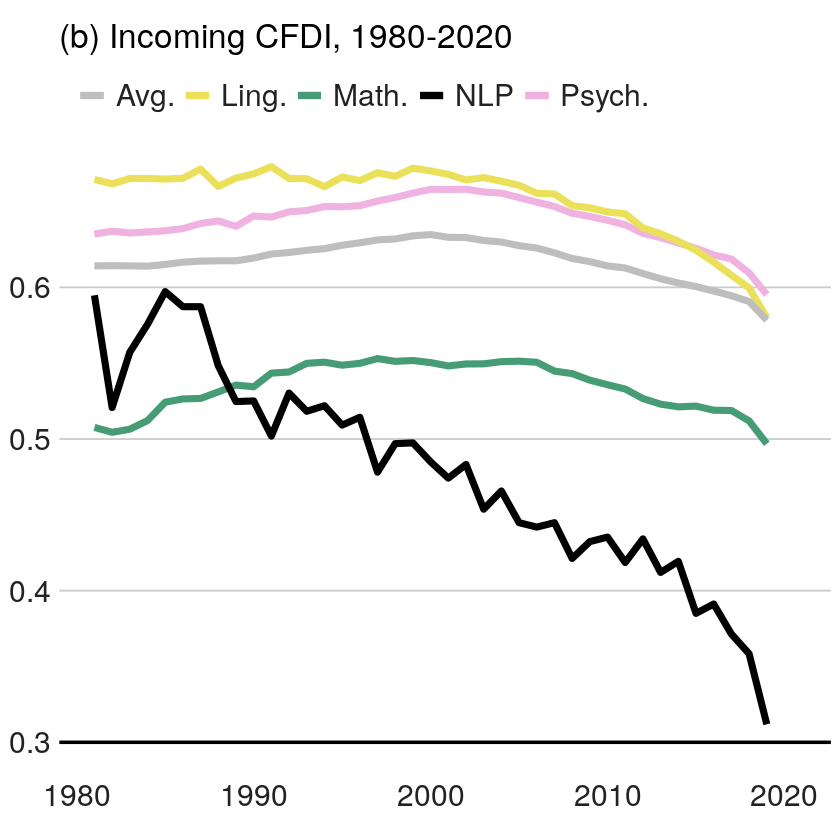

In [7]:
# Define colors
colors <- c("Ling." = "#eae059", "Math." = "#469c75", "Psych." = "#f0b2e0", "Avg." = "grey", "NLP" = "black")

# Filter the dataframe for the specified fields of study
filtered_fields_df <- all_fields_df %>% 
  filter(field %in% c("Mathematics", "Psychology", "Linguistics"))

# Update fields' names in the dataframe
filtered_fields_df$field <- factor(filtered_fields_df$field,
                                  levels = c("Mathematics", "Psychology", "Linguistics"),
                                  labels = c("Math.", "Psych.", "Ling."))
                                  
# Plotting the incoming diversity data
ggplot() +
  geom_line(data = filtered_fields_df, aes(x = year, y = avg_incoming_diversity, color = field), lwd=2) +
  geom_line(data = nlp_df, aes(x = year, y = incoming_diversity, color = "NLP"), lwd = 2) +
  geom_line(data = average_diversity_df, aes(x = year, y = avg_incoming_diversity, color = "Avg."), lwd = 2) +
  scale_color_manual(values = colors) +
  labs(x = "Year", y = "Incoming Diversity") +
  xlim(min(filtered_fields_df$year), max(filtered_fields_df$year) + 2 * extra_room) +
  bbc_style() +
  labs(subtitle = "(b) Incoming CFDI, 1980-2020") +
  geom_hline(yintercept = 0.3, linewidth=1, color = "black") +
  theme(legend.position = "top",
    legend.justification = "left",
    plot.subtitle = element_text(size = 20))

  ggsave("figures/incoming_diversity_over_time_r.pdf", height=5)

Saving 6.67 x 5 in image


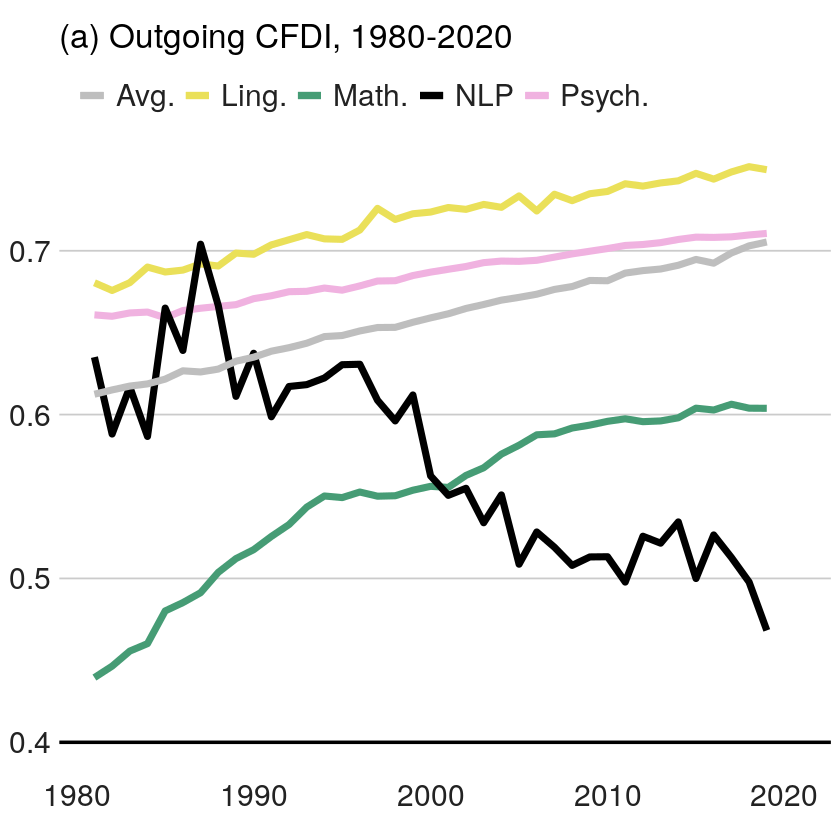

In [8]:
# Define colors
colors <- c("Ling." = "#eae059", "Math." = "#469c75", "Psych." = "#f0b2e0", "Avg." = "grey", "NLP" = "black")

# Filter the dataframe for the specified fields of study
filtered_fields_df <- all_fields_df %>% 
  filter(field %in% c("Mathematics", "Psychology", "Linguistics"))

# Update fields' names in the dataframe
filtered_fields_df$field <- factor(filtered_fields_df$field,
                                  levels = c("Mathematics", "Psychology", "Linguistics"),
                                  labels = c("Math.", "Psych.", "Ling."))

# Plotting the outgoing diversity data
ggplot() +
  geom_line(data = filtered_fields_df, aes(x = year, y = avg_outgoing_diversity, color = field), lwd=2) +
  geom_line(data = nlp_df, aes(x = year, y = outgoing_diversity, color = "NLP"), lwd = 2) +
  geom_line(data = average_diversity_df, aes(x = year, y = avg_outgoing_diversity, color = "Avg."), lwd = 2) +
  scale_color_manual(values = colors) +
  labs(x = "Year", y = "Outgoing Diversity") +
  xlim(min(filtered_fields_df$year), max(filtered_fields_df$year) + 2 * extra_room) +
  bbc_style() +
  labs(subtitle = "(a) Outgoing CFDI, 1980-2020") +
  geom_hline(yintercept = 0.4, linewidth=1, color = "black") +
  theme(legend.position = "top",
    legend.justification = "left",
    plot.subtitle = element_text(size = 20))

  ggsave("figures/outgoing_diversity_over_time_r.pdf", height=5)

# Non-CS vs CS


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


New names:
• `` -> `...1`
`summarise()` has grouped output by 'year', 'field1'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
Warning message:
“Removed 6 rows containing non-finite values (`stat_align()`).”
Saving 6.67 x 5 in image
Warning message:
“Removed 6 rows containing non-finite values (`stat_align()`).”


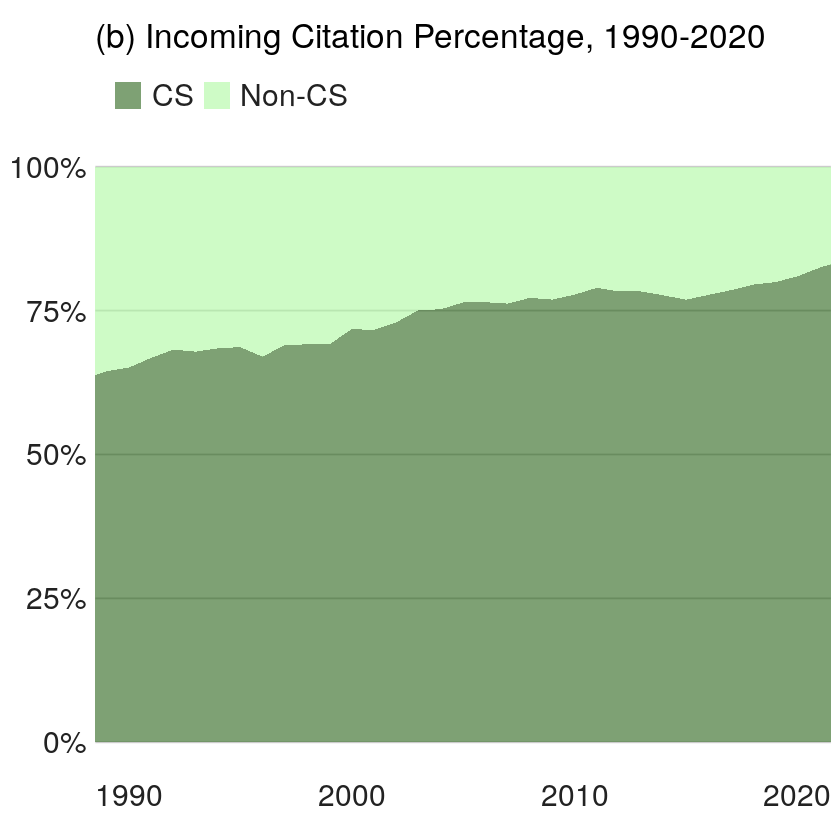

In [9]:
library(zoo)

# Read the general data
df <- read_csv('./outputs/citations_non_cs_fields_to_nlp_by_year_quantiles.csv', show_col_types = FALSE)

# Group by 'year', 'field1', and 'field2', then sum the citation counts
collapsed_df <- df %>%
  filter(year >= 1980) %>%
  group_by(year, field1, field2) %>%
  summarise(
    citations1_2 = sum(`#citations1->2`, na.rm = TRUE),
    citations2_1 = sum(`#citations2->1`, na.rm = TRUE),
    papersfield1 = sum(`#papersfield1`, na.rm = TRUE),
    papersfield2 = sum(`#papersfield2`, na.rm = TRUE),
  )

# Assign all field1 that are not Computer Science to non-CS
collapsed_df$field1 <- ifelse(collapsed_df$field1 != "Computer Science", "Non-CS", collapsed_df$field1)

# Assign all field1 that are Computer Science to CS
collapsed_df$field1 <- ifelse(collapsed_df$field1 == "Non-CS", "Non-CS", "CS")

# Compute totals
total_citations_per_year <- collapsed_df %>%
  group_by(year, field1) %>%
  summarise(
    total_incoming = sum(citations1_2),
    total_outgoing = sum(citations2_1)
  )

# Compute percentages of CS and non-CS citations per year using total_citations_per_year
total_citations_per_year <- total_citations_per_year %>%
  group_by(year) %>%
  mutate(
    perc_incoming = total_incoming / sum(total_incoming),
    perc_outgoing = total_outgoing / sum(total_outgoing)
  )

# Compute the moving averages
total_citations_per_year <- total_citations_per_year %>%
  arrange(year) %>%
  group_by(field1) %>%
  mutate(
    perc_incoming_ma = rollmean(perc_incoming, 4, fill = NA, align = "right")
  )

# Change factor levels of 'field1'
total_citations_per_year$field1 <- factor(total_citations_per_year$field1, levels = c("CS", "Non-CS"))


# Create the plot
ggplot(total_citations_per_year, aes(x = year, y = perc_incoming_ma, fill = field1)) +
  geom_area(position = position_stack(reverse = TRUE), alpha = 0.6) +
  coord_cartesian(xlim = c(1990, 2020)) +
  scale_fill_manual(values = c("CS" = "#296218", "Non-CS" = "#aef8a1")) +
  # scale_fill_manual(values = colors, labels = names(abbreviations)) +
  labs(x = "Year", y = "Incoming Citation Percentage, 1980-2020", fill = "Field") +
  scale_y_continuous(labels = scales::percent) +
  bbc_style() +
  labs(subtitle="(b) Incoming Citation Percentage, 1990-2020") +
  theme(legend.position = "top",
      legend.justification = "left",
      plot.subtitle = element_text(size = 20))

ggsave("figures/incoming_citation_percentage_cs_non_cs_over_time_r.pdf", height=5)

New names:
• `` -> `...1`
`summarise()` has grouped output by 'year', 'field1'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
Warning message:
“Removed 6 rows containing non-finite values (`stat_align()`).”
Saving 6.67 x 5 in image
Warning message:
“Removed 6 rows containing non-finite values (`stat_align()`).”


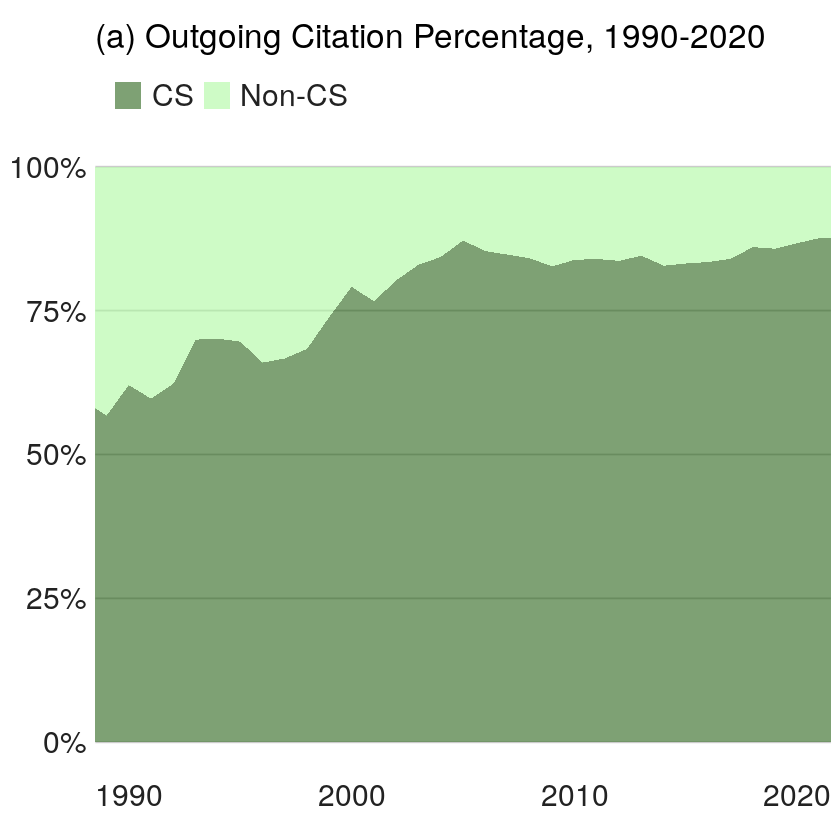

In [10]:
# Read the general data
df <- read_csv('./outputs/citations_non_cs_fields_to_nlp_by_year_quantiles.csv', show_col_types = FALSE)

# Group by 'year', 'field1', and 'field2', then sum the citation counts
collapsed_df <- df %>%
  filter(year >= 1980) %>%
  group_by(year, field1, field2) %>%
  summarise(
    citations1_2 = sum(`#citations1->2`, na.rm = TRUE),
    citations2_1 = sum(`#citations2->1`, na.rm = TRUE),
    papersfield1 = sum(`#papersfield1`, na.rm = TRUE),
    papersfield2 = sum(`#papersfield2`, na.rm = TRUE),
  )

# Assign all field1 that are not Computer Science to non-CS
collapsed_df$field1 <- ifelse(collapsed_df$field1 != "Computer Science", "Non-CS", collapsed_df$field1)

# Assign all field1 that are Computer Science to CS
collapsed_df$field1 <- ifelse(collapsed_df$field1 == "Non-CS", "Non-CS", "CS")

# Compute totals
total_citations_per_year <- collapsed_df %>%
  group_by(year, field1) %>%
  summarise(
    total_incoming = sum(citations1_2),
    total_outgoing = sum(citations2_1)
  )

# Compute percentages of CS and non-CS citations per year using total_citations_per_year
total_citations_per_year <- total_citations_per_year %>%
  group_by(year) %>%
  mutate(
    perc_incoming = total_incoming / sum(total_incoming),
    perc_outgoing = total_outgoing / sum(total_outgoing)
  )

# Compute the moving averages
total_citations_per_year <- total_citations_per_year %>%
  arrange(year) %>%
  group_by(field1) %>%
  mutate(
    perc_outgoing_ma = rollmean(perc_outgoing, 4, fill = NA, align = "right")
  )

# Create the plot
ggplot(total_citations_per_year, aes(x = year, y = perc_outgoing_ma, fill = field1)) +
  geom_area(position = position_stack(reverse = TRUE), alpha = 0.6) +
  coord_cartesian(xlim = c(1990, 2020)) +
  scale_fill_manual(values = c("CS" = "#296218", "Non-CS" = "#aef8a1")) +
  # scale_fill_manual(values = colors, labels = names(abbreviations)) +
  labs(x = "Year", y = "Outgoing Citation Percentage, 1980-2020", fill = "Field") +
  scale_y_continuous(labels = scales::percent) +
  bbc_style() +
  labs(subtitle="(a) Outgoing Citation Percentage, 1990-2020") +
  theme(legend.position = "top",
      legend.justification = "left",
      plot.subtitle = element_text(size = 20))
  
ggsave("figures/outgoing_citation_percentage_cs_non_cs_over_time_r.pdf", height=5)

# Non-CS Fields

In [11]:
library(dplyr)
library(readr)
library(ggplot2)
library(tidyr)

# Load the data
df <- read_csv('./outputs/citations_non_cs_fields_to_nlp_by_year_quantiles.csv', show_col_types = FALSE)

# Group by 'year', 'field1', and 'field2', then sum the citation counts
collapsed_df <- df %>%
  filter(year >= 1980) %>%
  group_by(year, field1, field2) %>%
  summarise(
    citations1_2 = sum(`#citations1->2`, na.rm = TRUE),
    citations2_1 = sum(`#citations2->1`, na.rm = TRUE),
    papersfield1 = sum(`#papersfield1`, na.rm = TRUE),
    papersfield2 = sum(`#papersfield2`, na.rm = TRUE),
  )

# Filter for NLP as field2 and not Computer Science as field1
nlp_df <- collapsed_df %>%
  filter(field2 == 'NLP', field1 != 'Computer Science')

# Compute percentages
total_incoming_citations_per_year <- nlp_df %>% group_by(year) %>% summarise(total_incoming = sum(citations1_2))
total_outgoing_citations_per_year <- nlp_df %>% group_by(year) %>% summarise(total_outgoing = sum(citations2_1))

nlp_df <- nlp_df %>%
  left_join(total_incoming_citations_per_year, by = "year") %>%
  left_join(total_outgoing_citations_per_year, by = "year") %>%
  mutate(
    perc_citations1_2 = citations1_2 / total_incoming,
    perc_citations2_1 = citations2_1 / total_outgoing
  )

# Filter only for specified fields
selected_fields <- c("Linguistics", "Mathematics", "Psychology", "Sociology")
nlp_df <- nlp_df %>%
  filter(field1 %in% selected_fields)

nlp_df <- nlp_df %>%
  group_by(field1) %>%
  arrange(year) %>%
  mutate(
    perc_citations1_2_rolling = zoo::rollmean(perc_citations1_2, 2, fill = NA),
    perc_citations2_1_rolling = zoo::rollmean(perc_citations2_1, 2, fill = NA)
  )

New names:
• `` -> `...1`
`summarise()` has grouped output by 'year', 'field1'. You can override using
the `.groups` argument.


Warning message:
“Removed 4 rows containing non-finite values (`stat_align()`).”
Saving 6.67 x 5 in image
Warning message:
“Removed 4 rows containing non-finite values (`stat_align()`).”


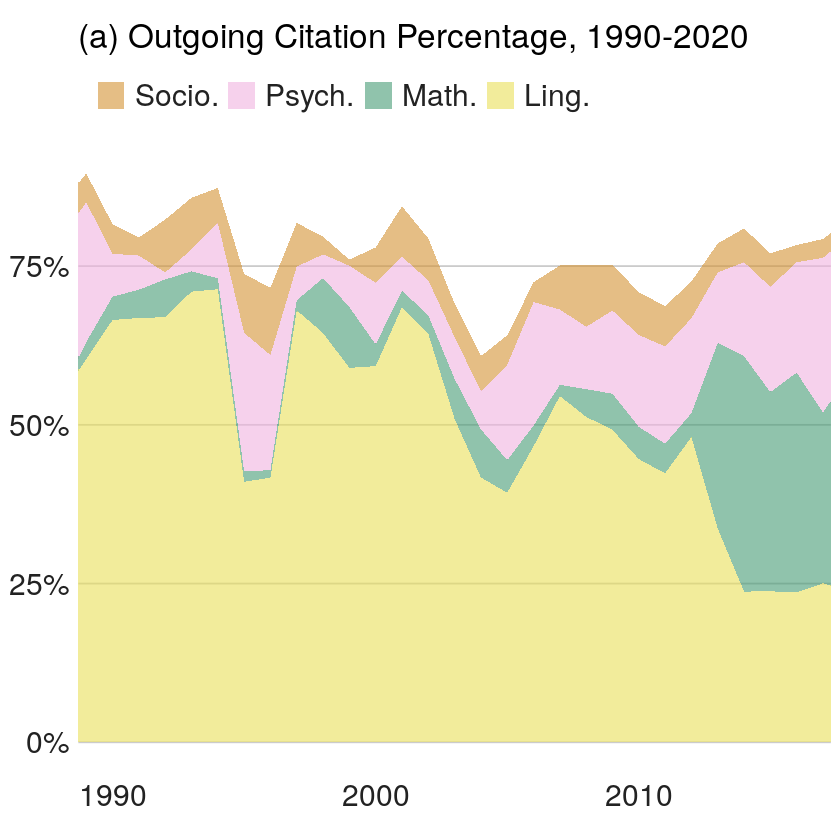

In [12]:
# Define colors
colors <- c("Linguistics" = "#eae059", "Mathematics" = "#469c75", "Psychology" = "#f0b2e0", "Sociology" = "#d39334")

# Define the order
order_fields <- c("Sociology", "Psychology", "Mathematics", "Linguistics")

# Define abbreviations
abbreviations <- c("Socio." = "Sociology",
                   "Psych." = "Psychology", 
                   "Math." = "Mathematics",
                   "Ling." = "Linguistics")

# Convert to a long dataframe for easy plotting
nlp_outgoing_long_df <- nlp_df %>%
  select(year, field1, perc_citations2_1_rolling) %>%
  rename(outgoing_citations = perc_citations2_1_rolling) %>%
  gather("citation_type", "percentage", outgoing_citations) %>%
  mutate(field1 = factor(field1, levels = order_fields))

# Create the plot
ggplot(nlp_outgoing_long_df, aes(x = year, y = percentage, fill = field1)) +
  geom_area(position = 'stack', alpha = 0.6) +
  coord_cartesian(xlim = c(1990, 2016)) +
  scale_fill_manual(values = colors, labels = names(abbreviations)) +
  labs(x = "Year", y = "Outgoing Citation Percentage", fill = "Field") +
  scale_y_continuous(labels = scales::percent) +
  bbc_style() +
  labs(subtitle="(a) Outgoing Citation Percentage, 1990-2020") +
  theme(legend.position = "top",
      legend.justification = "left",
      plot.subtitle = element_text(size = 20))

# Save the plot
ggsave("figures/non_cs_field_distribution_diachronic_outgoing_r.pdf", height=5)

Warning message:
“Removed 4 rows containing non-finite values (`stat_align()`).”
Saving 6.67 x 5 in image
Warning message:
“Removed 4 rows containing non-finite values (`stat_align()`).”


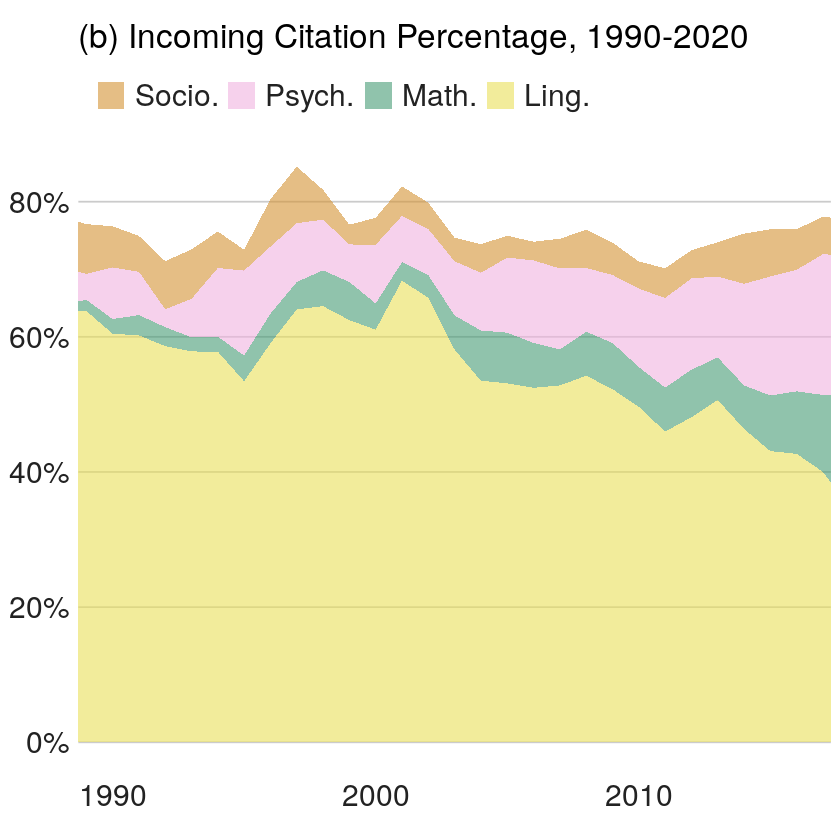

In [13]:
# Define colors
colors <- c("Linguistics" = "#eae059", "Mathematics" = "#469c75", "Psychology" = "#f0b2e0", "Sociology" = "#d39334")

# Define the order
order_fields <- c("Sociology", "Psychology", "Mathematics", "Linguistics")

# Define abbreviations
abbreviations <- c("Socio." = "Sociology",
                   "Psych." = "Psychology", 
                   "Math." = "Mathematics",
                   "Ling." = "Linguistics")

# Convert to a long dataframe for easy plotting
nlp_incoming_long_df <- nlp_df %>%
  select(year, field1, perc_citations1_2_rolling) %>%
  rename(incoming_citations = perc_citations1_2_rolling) %>%
  gather("citation_type", "percentage", incoming_citations) %>%
  mutate(field1 = factor(field1, levels = order_fields))

# Create the plot
ggplot(nlp_incoming_long_df, aes(x = year, y = percentage, fill = field1)) +
  geom_area(position = 'stack', alpha = 0.6) +
  coord_cartesian(xlim = c(1990, 2016)) +
  scale_fill_manual(values = colors, labels = names(abbreviations)) +
  labs(x = "Year", y = "Incoming Citation Percentage", fill = "Field") +
  scale_y_continuous(labels = scales::percent) +
  bbc_style() +
  labs(subtitle="(b) Incoming Citation Percentage, 1990-2020") +
  theme(legend.position = "top",
      legend.justification = "left",
      plot.subtitle = element_text(size = 20))

# Save the plot
ggsave("figures/non_cs_field_distribution_diachronic_incoming_r.pdf", height=5)

# CS Subfields

In [14]:
library(dplyr)
library(readr)
library(ggplot2)
library(tidyr)

# Load the data
df <- read.csv("outputs/citations_cs_fields_to_nlp_by_year.csv")

# Rename columns
df_cs_to_nlp <- df %>%
  rename(citations1_2 = `X.citations1..2`, citations2_1 = `X.citations2..1`)
  
# Compute percentages
total_incoming_citations_per_year <- df_cs_to_nlp %>% group_by(year) %>% summarise(total_incoming = sum(citations1_2))
total_outgoing_citations_per_year <- df_cs_to_nlp %>% group_by(year) %>% summarise(total_outgoing = sum(citations2_1))

df_cs_to_nlp <- df_cs_to_nlp %>%
  left_join(total_incoming_citations_per_year, by = "year") %>%
  left_join(total_outgoing_citations_per_year, by = "year") %>%
  mutate(
    perc_citations1_2 = citations1_2 / total_incoming,
    perc_citations2_1 = citations2_1 / total_outgoing
  )

# Filter only for specified fields
selected_fields <- c("artificial intelligence", "machine learning", "information retrieval", "computer imaging and vision", "data mining")
df_cs_to_nlp <- df_cs_to_nlp %>%
  filter(field1 %in% selected_fields)

df_cs_to_nlp <- df_cs_to_nlp %>%
  group_by(field1) %>%
  arrange(year) %>%
  mutate(
    perc_citations1_2_rolling = zoo::rollmean(perc_citations1_2, 2, fill = NA),
    perc_citations2_1_rolling = zoo::rollmean(perc_citations2_1, 2, fill = NA)
  )

Warning message:
“Removed 5 rows containing non-finite values (`stat_align()`).”
Saving 6.67 x 5 in image
Warning message:
“Removed 5 rows containing non-finite values (`stat_align()`).”


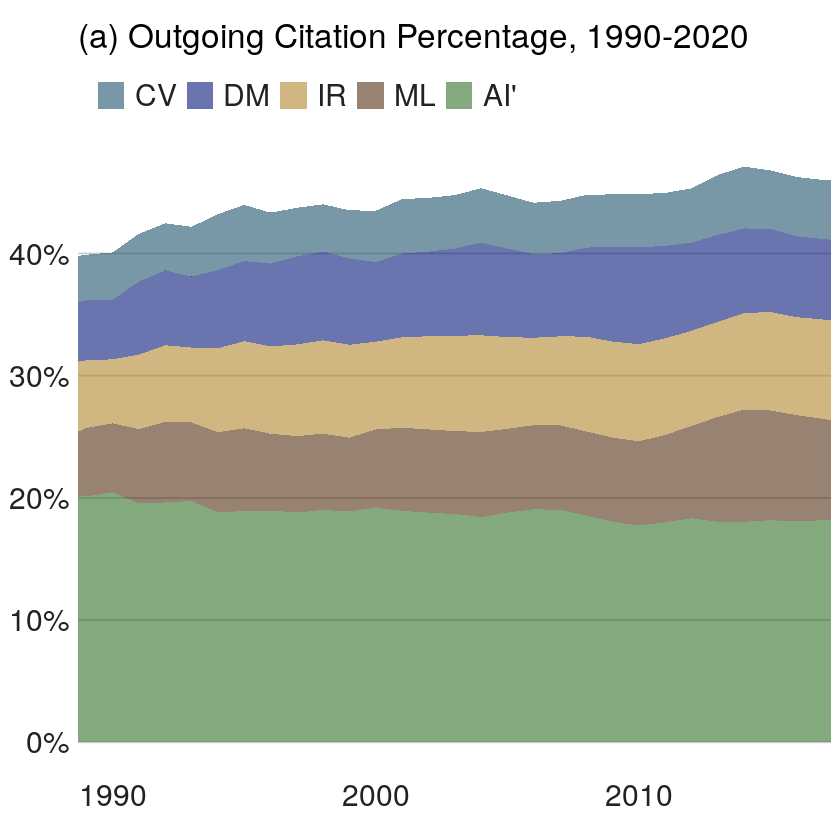

In [15]:
# Define colors
colors <- c("computer imaging and vision" = "#20546c", 
            "data mining" = "#071a7a",
            "information retrieval" = "#b1882f", 
            "machine learning" = "#543115", 
            "artificial intelligence" = "#34702a")

# Define the order
order_fields <- c("computer imaging and vision", "data mining", "information retrieval", "machine learning", "artificial intelligence")

# Define abbreviations
abbreviations <- c("CV" = "computer imaging and vision", 
                  "DM" = "data mining",
                  "IR" = "information retrieval", 
                  "ML" = "machine learning", 
                  "AI'" = "artificial intelligence")

# Convert to a long dataframe for easy plotting
nlp_outgoing_long_df <- df_cs_to_nlp %>%
  select(year, field1, perc_citations2_1_rolling) %>%
  rename(outgoing_citations = perc_citations2_1_rolling) %>%
  gather("citation_type", "percentage", outgoing_citations) %>%
  mutate(field1 = factor(field1, levels = order_fields))

# Create the plot
ggplot(nlp_outgoing_long_df, aes(x = year, y = percentage, fill = field1)) +
  geom_area(position = 'stack', alpha = 0.6) +
  coord_cartesian(xlim = c(1990, 2016)) +
  scale_fill_manual(values = colors, labels = names(abbreviations)) +
  labs(x = "Year", y = "Outgoing Citation Percentage", fill = "Field") +
  scale_y_continuous(labels = scales::percent) +
  bbc_style() +
  labs(subtitle="(a) Outgoing Citation Percentage, 1990-2020") +
  theme(legend.position = "top", legend.justification = "left",
        plot.subtitle = element_text(size = 20))

# Save the plot
ggsave("figures/cs_field_distribution_diachronic_outgoing_r.pdf", height=5)


Warning message:
“Removed 5 rows containing non-finite values (`stat_align()`).”
Saving 6.67 x 5 in image
Warning message:
“Removed 5 rows containing non-finite values (`stat_align()`).”


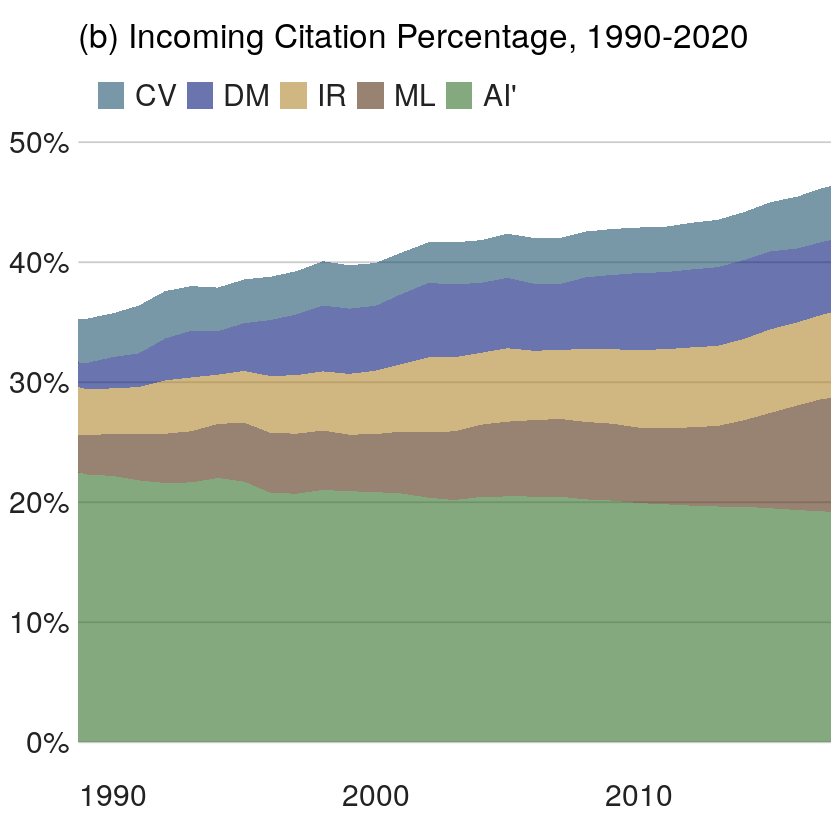

In [16]:
# Define colors
colors <- c("computer imaging and vision" = "#20546c", 
            "data mining" = "#071a7a",
            "information retrieval" = "#b1882f", 
            "machine learning" = "#543115", 
            "artificial intelligence" = "#34702a")

# Define the order
order_fields <- c("computer imaging and vision", "data mining", "information retrieval", "machine learning", "artificial intelligence")

# Define abbreviations
abbreviations <- c("CV" = "computer imaging and vision", 
                  "DM" = "data mining",
                  "IR" = "information retrieval", 
                  "ML" = "machine learning", 
                  "AI'" = "artificial intelligence")

# Convert to a long dataframe for easy plotting
nlp_incoming_ong_df <- df_cs_to_nlp %>%
  select(year, field1, perc_citations1_2_rolling) %>%
  rename(incoming_citations = perc_citations1_2_rolling) %>%
  gather("citation_type", "percentage", incoming_citations) %>%
  mutate(field1 = factor(field1, levels = order_fields))

# Create the plot
ggplot(nlp_incoming_ong_df, aes(x = year, y = percentage, fill = field1)) +
  geom_area(position = 'stack', alpha = 0.6) +
  coord_cartesian(xlim = c(1990, 2016)) +
  scale_fill_manual(values = colors, labels = names(abbreviations)) +
  labs(x = "Year", y = "Incoming Citation Percentage", fill = "Field") +
  scale_y_continuous(labels = scales::percent) +
  bbc_style() +
  labs(subtitle="(b) Incoming Citation Percentage, 1990-2020") +
  theme(legend.position = "top", legend.justification = "left",
        plot.subtitle = element_text(size = 20))

# Save the plot
ggsave("figures/cs_field_distribution_diachronic_incoming_r.pdf", height=5)

# Dumbbell Plots

In [17]:
# Load necessary libraries
library(dplyr)
library(readr)

# Load data from csv files
# citations_quantiles <- read_csv("outputs/citations_non_cs_fields_to_nlp_by_year_quantiles.csv") %>%
#   filter(field1 != "Computer Science", field2 != "Computer Science")

citations_quantiles <- read_csv("outputs/citations_non_cs_fields_to_nlp_by_year_quantiles.csv")

# citations_all <- read_csv("outputs/citations_all_non_cs_fields_by_year.csv") %>%
#   filter(field1 != "Computer Science", field2 != "Computer Science")

citations_all <- read_csv("outputs/citations_all_non_cs_fields_by_year.csv")

# Sum over all quantiles and year for citations_quantiles
citations_quantiles_sum <- citations_quantiles %>%
  group_by(field1) %>%
  summarise(
    total_citations_1to2 = sum(`#citations1->2`, na.rm = TRUE),
    total_citations_2to1 = sum(`#citations2->1`, na.rm = TRUE)
  )

# Calculate percentages
citations_quantiles_sum <- citations_quantiles_sum %>%
  mutate(
    nlp_perc_citations_1to2 = total_citations_1to2 / sum(total_citations_1to2) * 100,
    nlp_perc_citations_2to1 = total_citations_2to1 / sum(total_citations_2to1) * 100
  )

# Sum over all years for each field for citations_all
citations_all_sum <- citations_all %>%
  group_by(field1, field2) %>%
  summarise(
    total_citations_1to2 = sum(`#citations1->2`, na.rm = TRUE),
    total_citations_2to1 = sum(`#citations2->1`, na.rm = TRUE)
  )

# Calculate percentages
citations_all_sum <- citations_all_sum %>%
  group_by(field2) %>%
  mutate(
    perc_citations_1to2 = total_citations_1to2 / sum(total_citations_1to2) * 100,
    perc_citations_2to1 = total_citations_2to1 / sum(total_citations_2to1) * 100
  )

# Calculate macro average of citation percentage per field
citations_all_avg <- citations_all_sum %>%
  group_by(field1) %>%
  summarise(
    avg_perc_citations_1to2 = mean(perc_citations_1to2, na.rm = TRUE),
    avg_perc_citations_2to1 = mean(perc_citations_2to1, na.rm = TRUE)
  )

New names:
• `` -> `...1`
Rows: 4383 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): field1, field2, citationquantile
dbl (6): ...1, year, #citations1->2, #citations2->1, #papersfield1, #papersf...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 30682 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): field1, field2
dbl (6): ...1, year, #citations1->2, #citations2->1, #papersfield1, #papersf...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'field1'. You can override using the
`.groups` argument.


In [18]:
# Load necessary libraries
library(tidyr)
library(ggalt)

# Merging both data frames to one for ease of plotting
plot_data <- merge(citations_all_avg, citations_quantiles_sum, by = "field1")

# Filter Computer Science as field2
# plot_data <- plot_data %>%
#   filter(field1 != "Computer Science")

# Create a mapping from full field names to abbreviations
field_abbreviations <- c("Agricultural And Food Sciences" = "Agr. & Food Science",
                         "Environmental Science" = "Env. Science")

# Apply the abbreviations to the field names
plot_data <- plot_data %>%
  mutate(field1 = ifelse(field1 %in% names(field_abbreviations),
                         field_abbreviations[field1],
                         field1))

# Calculate the difference from the macro average
plot_data <- plot_data %>%
  mutate(diff_from_avg = nlp_perc_citations_2to1 - avg_perc_citations_2to1)

# Reorder the fields by highest diff_from_avg
plot_data <- plot_data %>%
  mutate(field1 = reorder(field1, diff_from_avg))

# Creating dumbbell plot
ggplot(plot_data, aes(y = field1, x = diff_from_avg, xend = 0)) +
  geom_dumbbell(colour = "#dddddd",
                size = 3,
                colour_x = "#ffffff00",
                colour_xend = "#ffffff00") +
  geom_vline(xintercept = 0, color = "black", size = 1) +
  # scale_color_manual(
  #   name = "Group",
  #   values = c('NLP' = "black")
  # ) +
  geom_point(data = plot_data, aes(x = diff_from_avg, y = field1), color = "#000000",
            size = 3) +
  bbc_style() +
  labs(x = "Difference from Average (%)", y = "Field") +
  guides(color = guide_legend(override.aes = list(shape = 16))) +
  xlim(-20, 60) +
  expand_limits(x = 60) +
  expand_limits(x = -15) +
  scale_x_continuous(breaks = c(-15, 0, 15, 30, 45, 60), labels = function(x) paste0(x, "%")) +
  geom_text(aes(x = 6, y = nrow(plot_data) + 3, label = "Above average"), size = 12/.pt,
            vjust = 1, hjust = 0, color = "#777777") +
  geom_text(aes(x = -6, y = nrow(plot_data) + 3, label = "Below average"), size = 12/.pt,
            vjust = 1, hjust = 1, color = "#777777") +
  geom_segment(x = 6, xend = 16, y = nrow(plot_data) + 3.5, yend = nrow(plot_data) + 3.5, color="#777777",
               arrow = arrow(length = unit(0.25, "cm"))) +
  geom_segment(x = -6, xend = -16, y = nrow(plot_data) + 3.5, yend = nrow(plot_data) + 3.5, color="#777777",
               arrow = arrow(length = unit(0.25, "cm"))) +
  coord_cartesian(clip = "off", ylim = c(0, nrow(plot_data) + 1.4)) + 
  theme(
    axis.text.y = element_text(size = 14), #reduce the font size of the x-axis labels
    plot.subtitle = element_text(hjust = 0, vjust=8), # increase the top margin to add space between the subtitle and the figure
    panel.grid.major.x = element_line(colour = "#cccccc"),
    panel.grid.major.y = element_blank(),
    plot.margin = margin(0, 0, 0, 0, "cm"),
    # legend.margin = margin(0, 0, 30, -550),
  )
    
ggsave("figures/outgoing_nlp_citations_compared_to_average.pdf", height=9)

ERROR: Error: package or namespace load failed for ‘ggalt’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/usr/local/lib/R/site-library/proj4/libs/proj4.so':
  libproj.so.22: cannot open shared object file: No such file or directory


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


Saving 6.67 x 9 in image


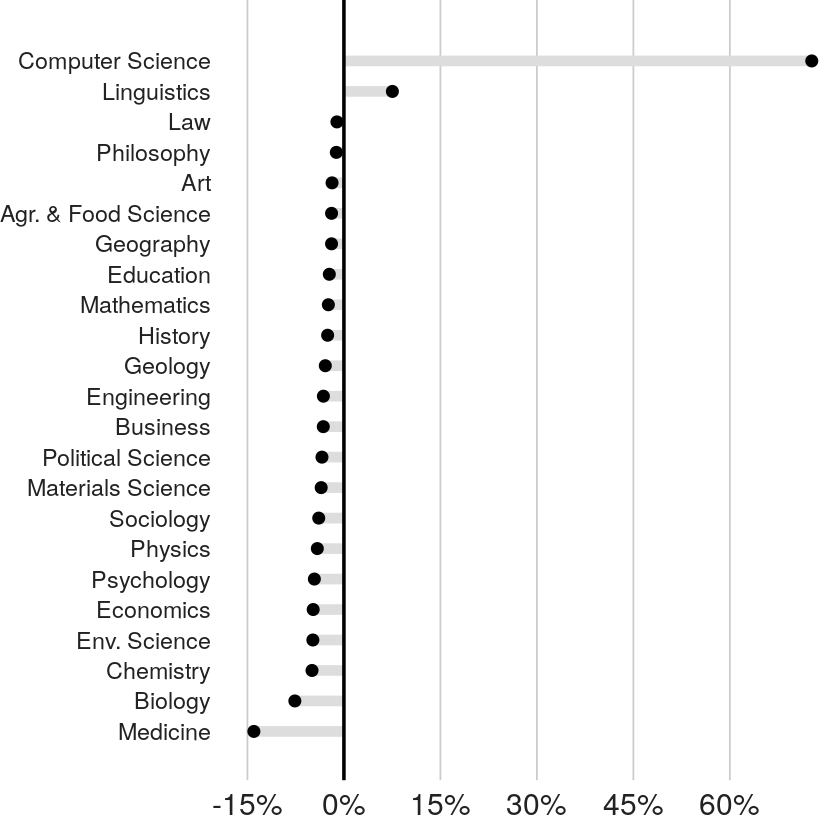

In [ ]:
# Load necessary libraries
library(tidyr)
library(ggalt)

# Merging both data frames to one for ease of plotting
plot_data <- merge(citations_all_avg, citations_quantiles_sum, by = "field1")

# Create a mapping from full field names to abbreviations
field_abbreviations <- c("Agricultural And Food Sciences" = "Agr. & Food Science",
                         "Environmental Science" = "Env. Science")

# Apply the abbreviations to the field names
plot_data <- plot_data %>%
  mutate(field1 = ifelse(field1 %in% names(field_abbreviations),
                         field_abbreviations[field1],
                         field1))

# Calculate the difference from the macro average
plot_data <- plot_data %>%
  mutate(diff_from_avg = nlp_perc_citations_1to2 - avg_perc_citations_1to2)

# Reorder the fields by highest diff_from_avg
plot_data <- plot_data %>%
  mutate(field1 = reorder(field1, diff_from_avg))

# Creating dumbbell plot
ggplot(plot_data, aes(y = field1, x = diff_from_avg, xend = 0)) +
  geom_dumbbell(colour = "#dddddd",
                size = 3,
                colour_x = "#ffffff00",
                colour_xend = "#ffffff00") +
  geom_vline(xintercept = 0, color = "black", size = 1) +
  geom_point(data = plot_data, aes(x = diff_from_avg, y = field1), color = "#000000",
             size = 3) +
  bbc_style() +
  labs(x = "Difference from Average (%)", y = "Field") +
  guides(color = guide_legend(override.aes = list(shape = 16))) +
  xlim(-20, 60) +
  expand_limits(x = 60) +
  expand_limits(x = -15) +
  scale_x_continuous(breaks = c(-15, 0, 15, 30, 45, 60), labels = function(x) paste0(x, "%")) +
  geom_text(aes(x = 6, y = nrow(plot_data) + 3, label = "Above average"), size = 12/.pt,
            vjust = 1, hjust = 0, color = "#777777") +
  geom_text(aes(x = -6, y = nrow(plot_data) + 3, label = "Below average"), size = 12/.pt,
            vjust = 1, hjust = 1, color = "#777777") +
  geom_segment(x = 6, xend = 16, y = nrow(plot_data) + 3.5, yend = nrow(plot_data) + 3.5, color="#777777",
               arrow = arrow(length = unit(0.25, "cm"))) +
  geom_segment(x = -6, xend = -16, y = nrow(plot_data) + 3.5, yend = nrow(plot_data) + 3.5, color="#777777",
               arrow = arrow(length = unit(0.25, "cm"))) +
  coord_cartesian(clip = "off", ylim = c(0, nrow(plot_data) + 1.4)) + 
  theme(
    axis.text.y = element_text(size = 14), #reduce the font size of the x-axis labels
    plot.subtitle = element_text(hjust = 0, vjust=8), # increase the top margin to add space between the subtitle and the figure
    panel.grid.major.x = element_line(colour = "#cccccc"),
    panel.grid.major.y = element_blank(),
    plot.margin = margin(0, 0, 0, 0, "cm"),
    # legend.margin = margin(0, 0, 30, -550),
  )
    
ggsave("figures/incoming_nlp_citations_compared_to_average.pdf", height=9)

In [ ]:
# Merge average data back into citations_all_sum
citations_all_sum <- merge(citations_all_sum, citations_all_avg, by = "field1")

# Rename the field1 column
citations_all_sum <- citations_all_sum %>%
  mutate(field1 = case_when(
    field1 == "Agricultural And Food Sciences" ~ "Agr. & Food Science",
    field1 == "Environmental Science" ~ "Env. Science",
    TRUE ~ field1  # Keeps all other values the same
  ))

# Compute the minimum and maximum percentages for each field1
min_max_data <- citations_all_sum %>%
  group_by(field1) %>%
  summarise(lowest = min(perc_citations_1to2),
            highest = max(perc_citations_1to2),
            avg_perc_citations_1to2 = mean(perc_citations_1to2, na.rm = TRUE)) 
            
# Compute the difference from the average for each field1
min_max_data <- min_max_data %>%
  mutate(highest_diff_from_avg = highest - avg_perc_citations_1to2) %>%
  mutate(lowest_diff_from_avg = lowest - avg_perc_citations_1to2)

# Get the row number of the minimum and maximum percentages for each field1
min_max_rows <- min_max_data %>%
  group_by(field1) %>%
  summarise(min_row = which.min(highest_diff_from_avg),
            max_row = which.max(highest_diff_from_avg))

# Merging both data frames to one for ease of plotting
nlp_data <- merge(citations_all_avg, citations_quantiles_sum, by = "field1")

# Calculate the difference from the macro average
nlp_data <- nlp_data %>%
  mutate(highest_diff_from_avg = nlp_perc_citations_1to2 - avg_perc_citations_1to2)

# Rename nlp_data field1 to match min_max_data field1
nlp_data <- nlp_data %>%
  mutate(field1 = case_when(
    field1 == "Agricultural And Food Sciences" ~ "Agr. & Food Science",
    field1 == "Environmental Science" ~ "Env. Science",
    TRUE ~ field1  # Keeps all other values the same
  ))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


Saving 6.67 x 9 in image


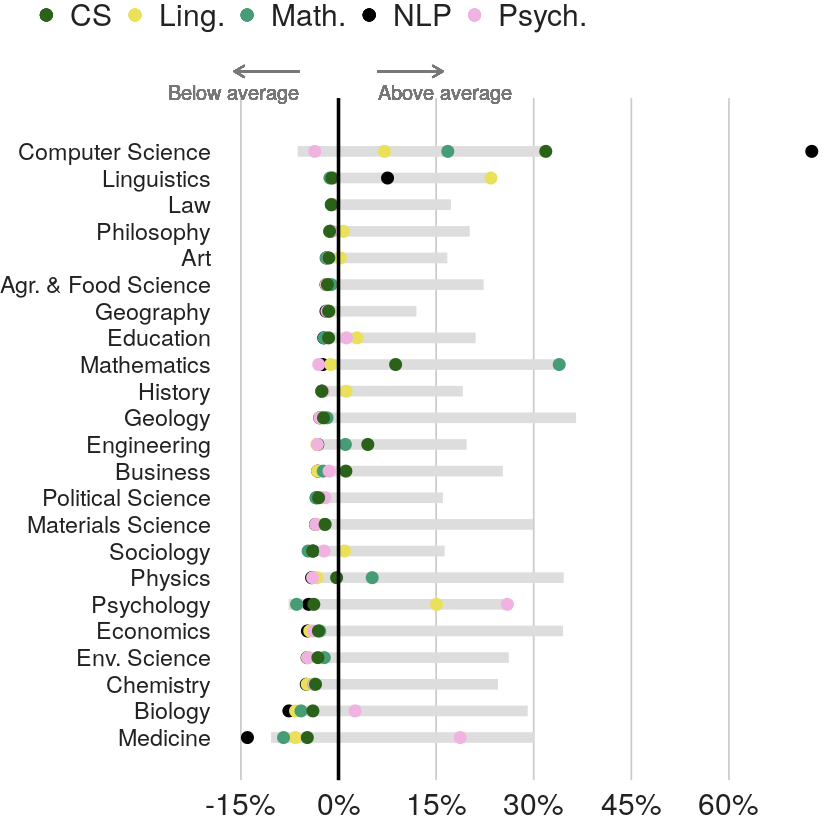

In [ ]:
# Create subsets for each field
linguistics <- citations_all_sum %>%
  filter(field2 == "Linguistics") %>%
  mutate(highest_diff_from_avg = perc_citations_1to2 - avg_perc_citations_1to2)

mathematics <- citations_all_sum %>%
  filter(field2 == "Mathematics") %>%
  mutate(highest_diff_from_avg = perc_citations_1to2 - avg_perc_citations_1to2)

psychology <- citations_all_sum %>%
  filter(field2 == "Psychology") %>%
  mutate(highest_diff_from_avg = perc_citations_1to2 - avg_perc_citations_1to2)

cs <- citations_all_sum %>%
  filter(field2 == "Computer Science") %>%
  mutate(highest_diff_from_avg = perc_citations_1to2 - avg_perc_citations_1to2)

# Get a vector of the diff_from_avg values from plot_data in the correct order
diff_from_avg_values <- plot_data$diff_from_avg[match(nlp_data$field1, plot_data$field1)]

# Add the diff_from_avg column to nlp_data and your other dataframes
nlp_data$diff_from_avg <- diff_from_avg_values
linguistics$diff_from_avg <- diff_from_avg_values
mathematics$diff_from_avg <- diff_from_avg_values
psychology$diff_from_avg <- diff_from_avg_values
cs$diff_from_avg <- diff_from_avg_values
min_max_data$diff_from_avg <- diff_from_avg_values

# Create the plot with the lowest and highest percentages as x-axis
ggplot(min_max_data, aes(x = lowest_diff_from_avg, xend = highest_diff_from_avg, y = reorder(field1, diff_from_avg))) +
  geom_dumbbell(size = 3,
                colour_x = "#ffffff00",
                colour_xend = "#ffffff00",
                colour = "#dddddd") +
  geom_point(data = nlp_data, aes(x = highest_diff_from_avg, y = field1, color = "NLP"), size = 3) +
  geom_point(data = linguistics, aes(x = highest_diff_from_avg, y = field1, color = "Ling."), size = 3) +
  geom_point(data = mathematics, aes(x = highest_diff_from_avg, y = field1, color = "Math."), size = 3) +
  geom_point(data = psychology, aes(x = highest_diff_from_avg, y = field1, color = "Psych."), size = 3) +
  geom_point(data = cs, aes(x = highest_diff_from_avg, y = field1, color = "CS"), size = 3) +
  geom_vline(xintercept = 0, color = "black", size = 1) +
  bbc_style() +
  labs(x = "Percentage", y = "Field1") +
  xlim(-10, 60) +
  expand_limits(x = 60) +
  scale_x_continuous(breaks = c(-15, 0, 15, 30, 45, 60), labels = function(x) paste0(x, "%")) +
  coord_cartesian(clip = "off", ylim = c(0, nrow(min_max_data) + 1.4)) +
  geom_text(aes(x = 6, y = nrow(plot_data) + 2.5, label = "Above average"), size = 12/.pt,
            vjust = 1, hjust = 0, color = "#777777") +
  geom_text(aes(x = -6, y = nrow(plot_data) + 2.5, label = "Below average"), size = 12/.pt,
            vjust = 1, hjust = 1, color = "#777777") +
  geom_segment(x = 6, xend = 16, y = nrow(plot_data) + 3, yend = nrow(plot_data) + 3, color="#777777",
               arrow = arrow(length = unit(0.25, "cm"))) +
  geom_segment(x = -6, xend = -16, y = nrow(plot_data) + 3, yend = nrow(plot_data) + 3, color="#777777",
               arrow = arrow(length = unit(0.25, "cm"))) +
  scale_color_manual(
    name = "Group",
    values = c('NLP' = "black", 'Ling.' = "#eae059", 'Math.' = "#469c75", 'Psych.' = "#f0b2e0", 'CS' = "#296218")
  ) +
  theme(
    axis.text.y = element_text(size = 14), #reduce the font size of the x-axis labels
    plot.subtitle = element_text(hjust = -0.2, vjust=8), # increase the top margin to add space between the subtitle and the figure
    panel.grid.major.x = element_line(colour = "#cccccc"),
    panel.grid.major.y = element_blank(),
    plot.margin = margin(0, 0, 0, 0, "cm"),
    legend.margin = margin(0, 0, 30, -270),
  )

    
ggsave("figures/incoming_nlp_citations_compared_to_average_min_max.pdf", height=9)

In [ ]:
# Merge average data back into citations_all_sum
citations_all_sum <- merge(citations_all_sum, citations_all_avg, by = "field1")

# Rename the field1 column
citations_all_sum <- citations_all_sum %>%
  mutate(field1 = case_when(
    field1 == "Agricultural And Food Sciences" ~ "Agr. & Food Science",
    field1 == "Environmental Science" ~ "Env. Science",
    TRUE ~ field1  # Keeps all other values the same
  ))

# Compute the minimum and maximum percentages for each field1
min_max_data <- citations_all_sum %>%
  group_by(field1) %>%
  summarise(lowest = min(perc_citations_2to1),
            highest = max(perc_citations_2to1),
            avg_perc_citations_2to1 = mean(perc_citations_2to1, na.rm = TRUE)) 
            
# Compute the difference from the average for each field1
min_max_data <- min_max_data %>%
  mutate(highest_diff_from_avg = highest - avg_perc_citations_2to1) %>%
  mutate(lowest_diff_from_avg = lowest - avg_perc_citations_2to1)

# Get the row number of the minimum and maximum percentages for each field1
min_max_rows <- min_max_data %>%
  group_by(field1) %>%
  summarise(min_row = which.min(highest_diff_from_avg),
            max_row = which.max(highest_diff_from_avg))

# Merging both data frames to one for ease of plotting
nlp_data <- merge(citations_all_avg, citations_quantiles_sum, by = "field1")

# Calculate the difference from the macro average
nlp_data <- nlp_data %>%
  mutate(highest_diff_from_avg = nlp_perc_citations_2to1 - avg_perc_citations_2to1)

# Rename nlp_data field1 to match min_max_data field1
nlp_data <- nlp_data %>%
  mutate(field1 = case_when(
    field1 == "Agricultural And Food Sciences" ~ "Agr. & Food Science",
    field1 == "Environmental Science" ~ "Env. Science",
    TRUE ~ field1  # Keeps all other values the same
  ))

In [ ]:
# Create subsets for each field
linguistics <- citations_all_sum %>%
  filter(field2 == "Linguistics") %>%
  mutate(highest_diff_from_avg = perc_citations_2to1 - avg_perc_citations_2to1)

mathematics <- citations_all_sum %>%
  filter(field2 == "Mathematics") %>%
  mutate(highest_diff_from_avg = perc_citations_2to1 - avg_perc_citations_2to1)

psychology <- citations_all_sum %>%
  filter(field2 == "Psychology") %>%
  mutate(highest_diff_from_avg = perc_citations_2to1 - avg_perc_citations_2to1)

cs <- citations_all_sum %>%
  filter(field2 == "Computer Science") %>%
  mutate(highest_diff_from_avg = perc_citations_2to1 - avg_perc_citations_2to1)

# Get a vector of the diff_from_avg values from plot_data in the correct order
diff_from_avg_values <- plot_data$diff_from_avg[match(nlp_data$field1, plot_data$field1)]

# Add the diff_from_avg column to nlp_data and your other dataframes
nlp_data$diff_from_avg <- diff_from_avg_values
linguistics$diff_from_avg <- diff_from_avg_values
mathematics$diff_from_avg <- diff_from_avg_values
psychology$diff_from_avg <- diff_from_avg_values
cs$diff_from_avg <- diff_from_avg_values
min_max_data$diff_from_avg <- diff_from_avg_values

# Create the plot with the lowest and highest percentages as x-axis
ggplot(min_max_data, aes(x = lowest_diff_from_avg, xend = highest_diff_from_avg, y = reorder(field1, diff_from_avg))) +
  geom_dumbbell(size = 3,
                colour_x = "#ffffff00",
                colour_xend = "#ffffff00",
                colour = "#dddddd") +
                # colour = "#dddddd",
                # colour_x = "#FAAB18",
                # colour_xend = "#1380A1") +
  geom_point(data = nlp_data, aes(x = highest_diff_from_avg, y = field1, color = "NLP"), size = 3) +
  geom_point(data = linguistics, aes(x = highest_diff_from_avg, y = field1, color = "Ling."), size = 3) +
  geom_point(data = mathematics, aes(x = highest_diff_from_avg, y = field1, color = "Math."), size = 3) +
  geom_point(data = psychology, aes(x = highest_diff_from_avg, y = field1,  color = "Psych.",), size = 3) +
  geom_point(data = cs, aes(x = highest_diff_from_avg, y = field1, color = "CS"), size = 3) +
  geom_vline(xintercept = 0, color = "black", size = 1) +
  bbc_style() +
  labs(x = "Percentage", y = "Field1") +
  xlim(-10, 60) +
  expand_limits(x = 60) +
  expand_limits(x = -15) +
  scale_x_continuous(breaks = c(-15, 0, 15, 30, 45, 60), labels = function(x) paste0(x, "%")) +
  coord_cartesian(clip = "off", ylim = c(0, nrow(min_max_data) + 1.4)) +
  geom_text(aes(x = 6, y = nrow(plot_data) + 2.5, label = "Above average"), size = 12/.pt,
            vjust = 1, hjust = 0, color = "#777777") +
  geom_text(aes(x = -6, y = nrow(plot_data) + 2.5, label = "Below average"), size = 12/.pt,
            vjust = 1, hjust = 1, color = "#777777") +
  geom_segment(x = 6, xend = 16, y = nrow(plot_data) + 3, yend = nrow(plot_data) + 3, color="#777777",
               arrow = arrow(length = unit(0.25, "cm"))) +
  geom_segment(x = -6, xend = -16, y = nrow(plot_data) + 3, yend = nrow(plot_data) + 3, color="#777777",
               arrow = arrow(length = unit(0.25, "cm"))) +
  # labs(subtitle="Outgoing Citations", align="left") +
  scale_color_manual(
    name = "Group",
    values = c('NLP' = "black", 'Ling.' = "#eae059", 'Math.' = "#469c75", 'Psych.' = "#f0b2e0", 'CS' = "#296218")
  ) +
  theme(
    axis.text.y = element_text(size = 14), #reduce the font size of the x-axis labels
    plot.subtitle = element_text(hjust = 0, vjust=8), # increase the top margin to add space between the subtitle and the figure
    panel.grid.major.x = element_line(colour = "#cccccc"),
    panel.grid.major.y = element_blank(),
    plot.margin = margin(0, 0, 0, 0, "cm"),
    legend.margin = margin(0, 0, 30, -270),
  )
    
ggsave("figures/outgoing_nlp_citations_compared_to_average_min_max.pdf", height=9)

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `highest_diff_from_avg = perc_citations_2to1 -
  avg_perc_citations_2to1`.
[1mCaused by error:[22m
[33m![39m object 'avg_perc_citations_2to1' not found


In [ ]:
citations_all_sum

field1,field2,total_citations_1to2,total_citations_2to1,perc_citations_1to2,perc_citations_2to1,avg_perc_citations_1to2.x,avg_perc_citations_2to1.x,avg_perc_citations_1to2.y,avg_perc_citations_2to1.y
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Art,Economics,548426,547540,0.51913444,0.44903251,2.107777,1.781672,2.107777,1.781672
Art,Education,1062464,709150,1.38985333,1.05444932,2.107777,1.781672,2.107777,1.781672
Art,Engineering,746200,528744,0.29998437,0.23976357,2.107777,1.781672,2.107777,1.781672
Art,Environmental Science,268594,181561,0.10308224,0.07576548,2.107777,1.781672,2.107777,1.781672
Art,Linguistics,310984,293737,2.37514623,2.24594452,2.107777,1.781672,2.107777,1.781672
Art,Materials Science,214284,191750,0.06536323,0.06720047,2.107777,1.781672,2.107777,1.781672
Art,Mathematics,256589,258159,0.19096374,0.14913989,2.107777,1.781672,2.107777,1.781672
Art,Medicine,1387457,1331479,0.08151366,0.07387205,2.107777,1.781672,2.107777,1.781672
Art,Philosophy,805829,913577,6.19261157,5.68096570,2.107777,1.781672,2.107777,1.781672


# Subfields

In [20]:
# Load the necessary libraries
library(ggplot2)
library(dplyr)
library(readr)

# Load the data
df <- read_csv("outputs/insularity_NLP_subfields.csv")

# Take a glimpse at the data
glimpse(df)

# Manipulate the data to get the top and bottom 5 by "Same Subfield (%)"
df_ordered <- df %>%
  arrange(desc(`Same Subfield (%)`)) %>%
  slice(c(1:5, (n()-4):n()))

Rows: 22 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): arr_category
dbl (5): Same Subfield, Other Subfield, total_citations, Same Subfield (%), ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 22
Columns: 6
$ arr_category         <chr> "Machine Translation", "Machine Learning for NLP"…
$ `Same Subfield`      <dbl> 133695, 41739, 11753, 26830, 14737, 4837, 11582, …
$ `Other Subfield`     <dbl> 69787, 78658, 52467, 32692, 19627, 28688, 21379, …
$ total_citations      <dbl> 203482, 120397, 64220, 59522, 34364, 33525, 32961…
$ `Same Subfield (%)`  <dbl> 65.703600, 34.667807, 18.301152, 45.075770, 42.88…
$ `Other Subfield (%)` <dbl> 34.29640, 65.33219, 81.69885, 54.92423, 57.11500,…


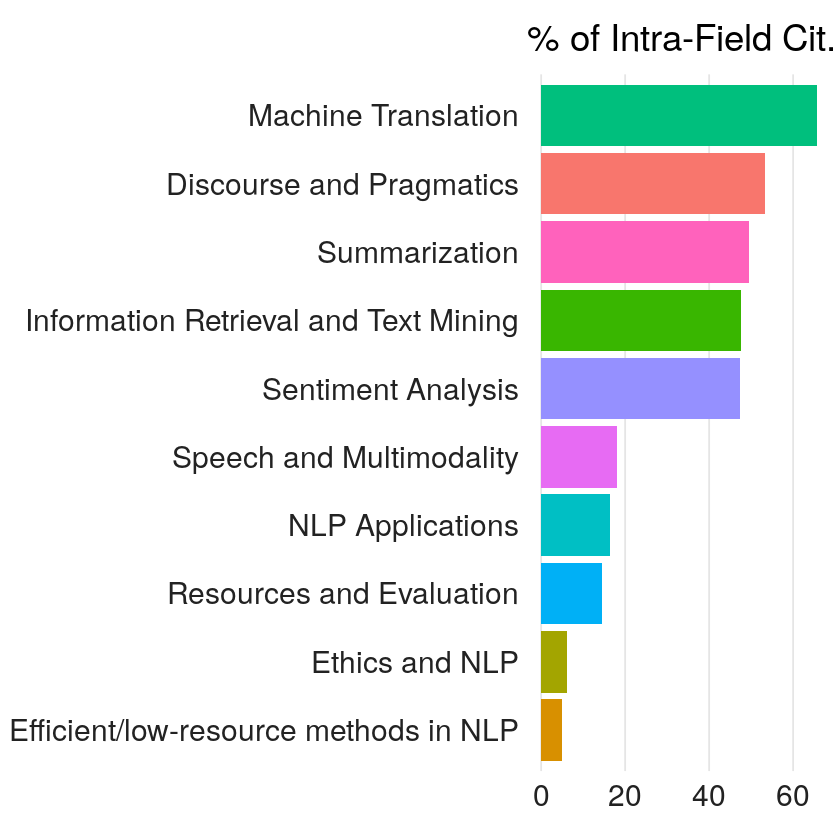

In [22]:
# Create the bar plot
ggplot(df_ordered, aes(x = reorder(arr_category, `Same Subfield (%)`), y = `Same Subfield (%)`, fill = arr_category)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  bbc_style() +
  labs(x = "Subfield", y = "Self Citation Percentage (%)", subtitle = "% of Intra-Field Cit. per NLP Subfield") +
  theme(legend.position = "none",
        panel.grid.major.y = element_blank(), 
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_line(color = "grey90")) 

ggsave(filename = "figures/insularity_subfields.pdf", width = 10, height = 5)